In [1]:
# -*- coding: utf-8 -*-
"""
Created on April 26, 2024
Last modified on April 26, 2024
@Author: Guan-Fu Liu

Description:
To test the utils.py in ChemEvoIMF package.
"""
import numpy as np
import pandas as pd
from scipy.integrate import quad
# import pyatomdb
import sys
sys.path.insert(0, '/Users/liuguanfu/Workspace/SAS-21/targets/MRK1216/spex/jupyter/IMF/chemevoimf')
import utils
import matplotlib.pyplot as plt
from scipy import interpolate
%matplotlib widget

In [2]:
Mini = np.array([0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.5, 
                 3.0, 4.0, 5.0, 6.0, 7.0, 9.0, 12.0, 15.0, 20.0, 30.0, 40.0, 60.0, 100.0, 120.0])

lifetime = { }

lifetime['Mini'] = Mini

lifetime['Z=0.0004'] = np.array([4.28e10, 2.37e10, 1.41e10, 8.97e9, 6.03e9, 4.23e9, 3.08e9, 2.34e9, 
                                 1.92e9, 1.66e9, 1.39e9, 1.18e9, 1.11e9, 9.66e8, 8.33e8, 4.64e8, 3.03e8,
                                 1.61e8, 1.01e8, 7.15e7, 5.33e7, 3.42e7, 2.13e7, 1.54e7, 1.06e7, 6.90e6, 
                                 5.45e6, 4.20e6, 3.32e6, 3.11e6])

lifetime['Z=0.004'] = np.array([5.35e10, 2.95e10, 1.73e10, 1.09e10, 7.13e9, 4.93e9, 3.52e9, 2.64e9,
                                2.39e9, 1.95e9, 1.63e9, 1.28e9, 1.25e9, 1.23e9, 1.08e9, 5.98e8, 3.67e8, 
                                1.82e8, 1.11e8, 7.62e7, 5.61e7, 3.51e7, 2.14e7, 1.52e7, 1.05e7, 6.85e6,
                                5.44e6, 4.19e6, 3.38e6, 3.23e6])

lifetime['Z=0.008'] = np.array([6.47e10, 3.54e10, 2.09e10, 1.30e10, 8.46e9, 5.72e9, 4.12e9, 2.92e9,
                                2.36e9, 2.18e9, 1.82e9, 1.58e9, 1.41e9, 1.25e9, 1.23e9, 6.86e8, 4.12e8,
                                1.93e8, 1.15e8, 7.71e7, 5.59e7, 3.44e7, 2.10e7, 1.49e7, 1.01e7, 6.65e6, 
                                5.30e6, 4.15e6, 3.44e6, 3.32e6])

lifetime['Z=0.02'] = np.array([7.92e10, 4.45e10, 2.61e10, 1.59e10, 1.03e10, 6.89e9, 4.73e9, 3.59e9,
                               2.87e9, 2.64e9, 2.18e9, 1.84e9, 1.59e9, 1.38e9, 1.21e9, 7.64e8, 4.56e8, 
                               2.03e8, 1.15e8, 7.45e7, 5.31e7, 3.17e7, 1.89e7, 1.33e7, 9.15e6, 6.13e6,
                               5.12e6, 4.12e6, 3.39e6, 3.23e6])

lifetime['Z=0.05'] = np.array([7.18e10, 4.00e10, 2.33e10, 1.42e10, 8.88e9, 5.95e9, 4.39e9, 3.37e9,
                               3.10e9, 2.51e9, 2.06e9, 1.76e9, 1.51e9, 1.34e9, 1.24e9, 6.58e8, 3.81e8, 
                               1.64e8, 8.91e7, 5.67e7, 3.97e7, 2.33e7, 1.39e7, 9.95e6, 6.99e6, 5.15e6, 
                               4.34e6, 3.62e6, 3.11e6, 3.11e6])

Z_list = [key for key in lifetime.keys() if 'Z=' in key]
Z_float = np.array([float(a.replace("Z=", "")) for a in Z_list])

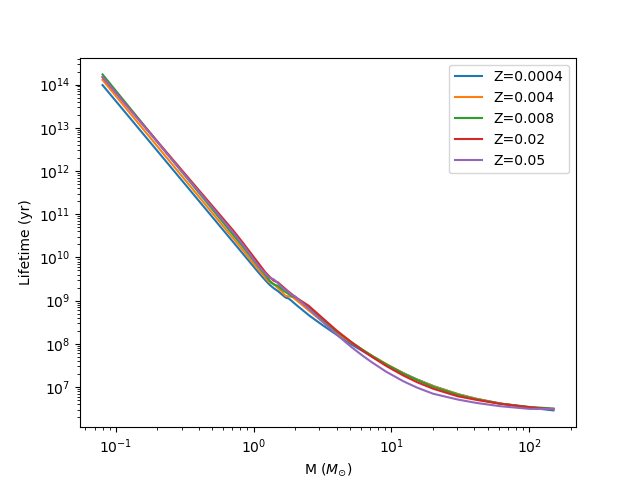

In [3]:
fig, ax = plt.subplots()
for key in lifetime.keys():
    if key == 'Mini':
        continue
    interp = interpolate.interp1d(np.log10(Mini), np.log10(lifetime[key]), kind=1, fill_value='extrapolate')
    M = np.logspace(np.log10(0.08), np.log10(150), 500)
    t = 10**interp(np.log10(M))
    t_test = utils.mass_to_lifetime(M, 0.0061)
    ax.plot(M, t, label=key)

ax.set_xlabel(r'M ($M_{\odot}$)')
ax.set_ylabel(r'Lifetime (yr)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
plt.show()

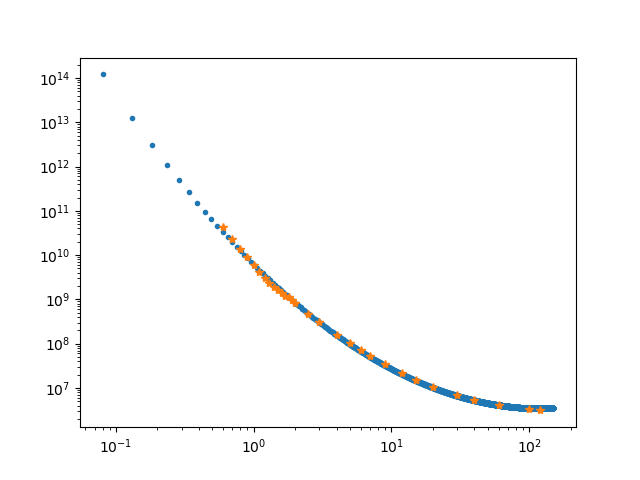

In [4]:
file = open('../../galIMF/yield_tables/rearranged/setllar_lifetime_from_portinari98/portinari98_Z=0.0004.txt','r')
lines = file.readlines()
file.close()
Mini1 = np.array(lines[3].split(), dtype=float)
lifetime1 = np.array(lines[5].split(), dtype=float)
fig, ax = plt.subplots()
ax.plot(Mini1, lifetime1, '.')
ax.plot(Mini, lifetime["Z=0.0004"], '*')
ax.set_xscale('log')
ax.set_yscale('log')

In [5]:
import math

file = open('../../galIMF/yield_tables/rearranged/setllar_lifetime_from_portinari98/portinari98_Z=0.0004.txt','r')
lines = file.readlines()
file.close()
Mini1 = np.array(lines[3].split(), dtype=float)
lifetime1 = np.array(lines[5].split(), dtype=float)

def fucntion_mass_boundary(time, mass_grid_for_lifetime, lifetime):
    # The adopted spline fit of portinari98 lifetime is not monotonic at the massive end. 
    # But this function ensures that lifetime is monotonically smaller for more massive stars.
    mass = mass_grid_for_lifetime
    length_list_lifetime = len(lifetime)
    x = round(length_list_lifetime / 2)
    loop_number_fucntion_mass_boundary = math.ceil(math.log(length_list_lifetime, 2))
    mass_boundary = 10000
    if lifetime[x] == time:
        mass_boundary = mass[x]
    else:
        i = 0
        low = 0
        high = length_list_lifetime
        while i < loop_number_fucntion_mass_boundary:
            if lifetime[x] > time:
                low = x
                x = x + round((high - x) / 2)
            else:
                high = x
                x = x - round((x - low) / 2)
            (i) = (i + 1)
        if x == length_list_lifetime - 1:
            mass_boundary = mass[x]
        else:
            if lifetime[x - 1] > time > lifetime[x]:
                x = x - 1
            mass_boundary = round(mass[x] + (mass[x + 1] - mass[x]) * (lifetime[x] - time) / (
                lifetime[x] - lifetime[x + 1]), 5)
    return mass_boundary


for i in range(1,10):
    print("After %0.2e yr"%(i*1e7))
    print("Stars with mass >=%0.4f Msun will explode in ChemEvoIMF"%utils.lifetime_to_mass(i*1e7, 0))
    print("Stars with mass >=%0.4f Msun will explode in galIMF"%fucntion_mass_boundary(i*1e7, Mini1, lifetime1))


In [8]:
for i in range(1,10):
    print("After %0.2e yr"%(i*1e7))
    print("Stars with mass >=%0.4f Msun will explode in ChemEvoIMF"%utils.lifetime_to_mass(i*1e7, 0))
    print("Stars with mass >=%0.4f Msun will explode in galIMF"%fucntion_mass_boundary(i*1e7, Mini1, lifetime1))


After 1.00e+07 yr
Stars with mass >=21.1314 Msun will explode in ChemEvoIMF
Stars with mass >=20.2899 Msun will explode in galIMF
After 2.00e+07 yr
Stars with mass >=12.5313 Msun will explode in ChemEvoIMF
Stars with mass >=12.0821 Msun will explode in galIMF
After 3.00e+07 yr
Stars with mass >=9.7457 Msun will explode in ChemEvoIMF
Stars with mass >=9.3556 Msun will explode in galIMF
After 4.00e+07 yr
Stars with mass >=8.2359 Msun will explode in ChemEvoIMF
Stars with mass >=7.9154 Msun will explode in galIMF
After 5.00e+07 yr
Stars with mass >=7.2580 Msun will explode in ChemEvoIMF
Stars with mass >=6.9992 Msun will explode in galIMF
After 6.00e+07 yr
Stars with mass >=6.5783 Msun will explode in ChemEvoIMF
Stars with mass >=6.3538 Msun will explode in galIMF
After 7.00e+07 yr
Stars with mass >=6.0671 Msun will explode in ChemEvoIMF
Stars with mass >=5.8686 Msun will explode in galIMF
After 8.00e+07 yr
Stars with mass >=5.6546 Msun will explode in ChemEvoIMF
Stars with mass >=5.4875 

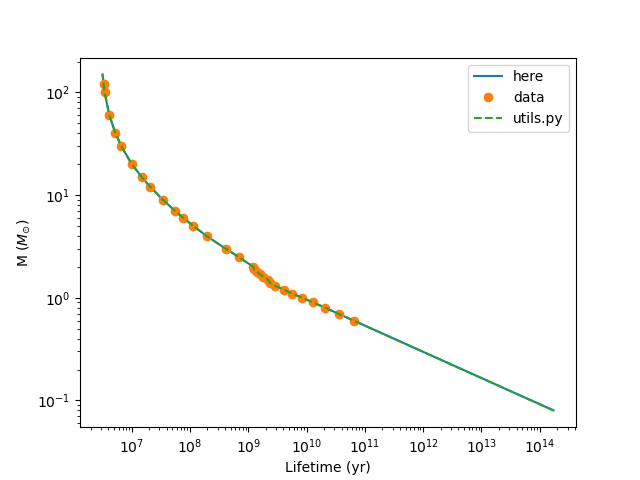

In [9]:
interp = interpolate.interp1d(np.log10(Mini), np.log10(lifetime['Z=0.008']), kind=1, fill_value='extrapolate')
M = np.logspace(np.log10(0.08), np.log10(150), 500)
t = 10**interp(np.log10(M))
t_test = utils.mass_to_lifetime(M, 0.0061)
fig, ax = plt.subplots()
ax.plot(t, M, label='here')
ax.plot(lifetime['Z=0.008'], Mini, 'o', label='data')
ax.plot(t_test, M,'--', label='utils.py')
ax.set_ylabel(r'M ($M_{\odot}$)')
ax.set_xlabel(r'Lifetime (yr)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
plt.show()

In [10]:
IMF = utils.IMF(IMF_type='PowerLaw', power_index=2.35)

m = np.logspace(np.log10(0.081), np.log10(149.999), 500)
xi = np.array([IMF.imf(a) for a in m])

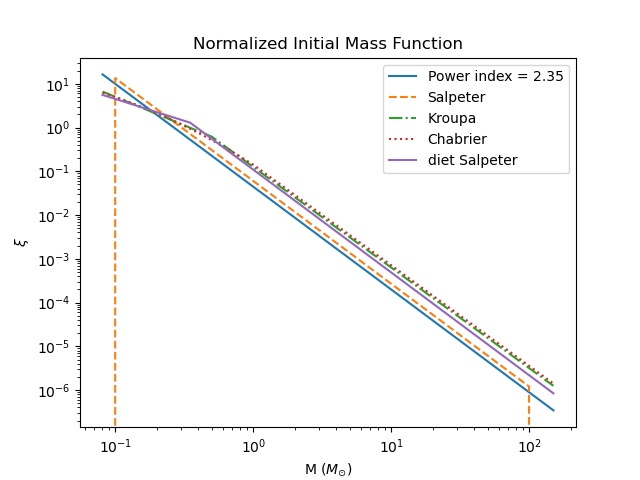

In [11]:
fig, ax = plt.subplots()
ax.plot(m, xi, label='Power index = 2.35')
ax.plot(m, np.array([IMF.Salpeter(a) for a in m]), '--', label='Salpeter')
ax.plot(m, np.array([IMF.Kroupa(a) for a in m]), '-.', label='Kroupa')
ax.plot(m, np.array([IMF.Chabrier(a) for a in m]), ':', label='Chabrier')
ax.plot(m, np.array([IMF.DietSalpeter(a) for a in m]), '-', label='diet Salpeter')
ax.set_xlabel(r'M ($M_{\odot}$)')
ax.set_ylabel(r'$\xi$')
ax.set_title('Normalized Initial Mass Function')
ax.legend()
ax.loglog()
plt.show()